CNN notebook © Arkaprabha Majumdar

In [1]:
#Let's load our model:
from google.colab import drive
drive.mount('/gdrive')
%cd ..

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/


In [2]:
from keras.datasets import mnist #popular image dataset

(x_train,y_train),(x_test,y_test) = mnist.load_data() #import the data

11493376/11490434 [==============================] - 2s 0us/step


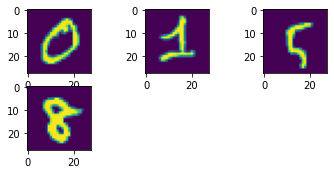

In [3]:
#Now we can plot the data from x_train as overview
#For visualization, we can use either OpenCV, which will open in a new window
# Or we can use matplotlib

import matplotlib.pyplot as plt

plt.subplot(331)
plt.imshow(x_train[1])

plt.subplot(332)
plt.imshow(x_train[24])

plt.subplot(333)
plt.imshow(x_train[100])

plt.subplot(334)
plt.imshow(x_train[2400])

plt.show()

In [4]:
#Now we know how the images look, so we need to feed into keras
x_train.shape

(60000, 28, 28)

We need to add another dimension to this because it is the format of keras input

In [5]:
x_train = x_train.reshape(x_train.shape + (1,))
x_train.shape

(60000, 28, 28, 1)

If image is grayscale, then value is 1. If image is color, then value is 3

In [6]:
x_test = x_test.reshape(x_test.shape + (1,))

input_shape = (28,28,1)

#then we change all values to float so we can normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#and Normalize
x_train /= 255
x_test /= 255

In [7]:
#One Hot encoding on data layers
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

In [8]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/Colab Notebooks/CNNs/models/digit_recognition_10_epoch_64_batches_cnn.h5')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

# **Saliency Visualisations**

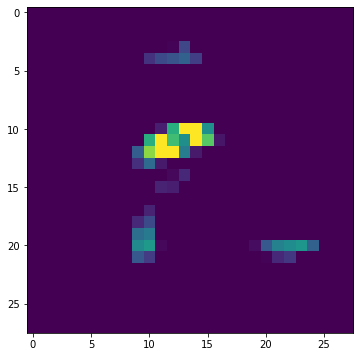

In [16]:
#!pip install -I scipy==1.2.*
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (18,6)

class_idx = 2 #refers to class id we're visualizing

layer_idx=-1

idx = np.where(y_test[:,class_idx]==1.)[0][0]

model.layers[layer_idx].activation = activations.linear

model = utils.apply_modifications(model)

filter_idx = 2 

gradient = visualize_saliency(model,layer_idx,filter_indices=filter_idx,seed_input=x_test[idx])

plt.imshow(gradient[...,0])

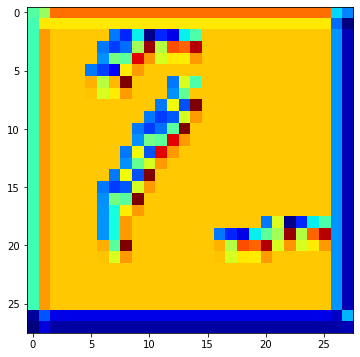

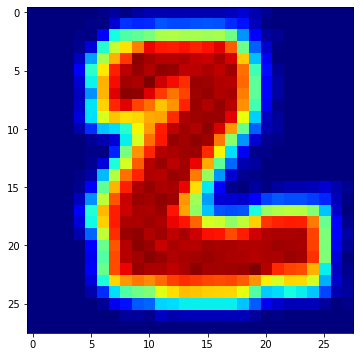

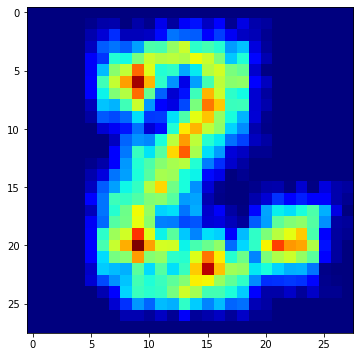

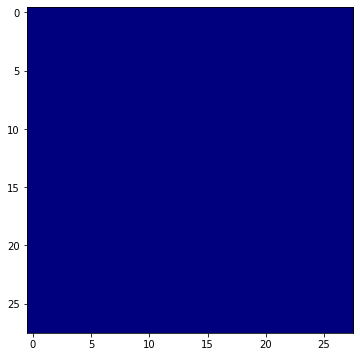

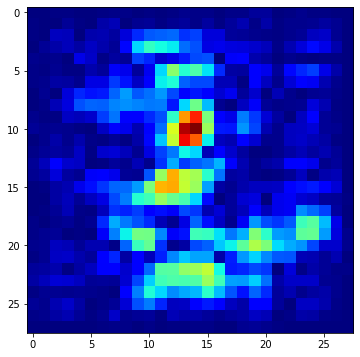

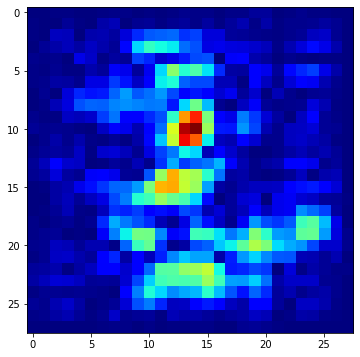

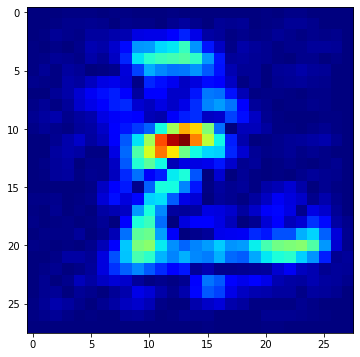

In [19]:
#How each layer of our CNN sees the image of "2"
for num_idx in list(range(7)):
  try:
    gradient = visualize_saliency(model,num_idx,filter_indices=filter_idx,
                                  seed_input=x_test[idx])
  except Exception as e:
    pass 
  plt.figure()
  plt.imshow(gradient,cmap='jet')

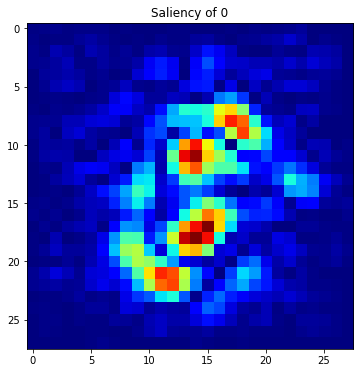

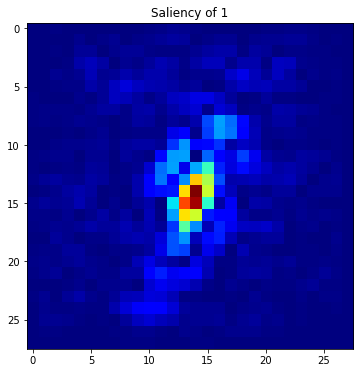

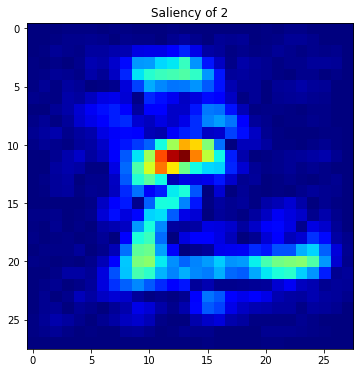

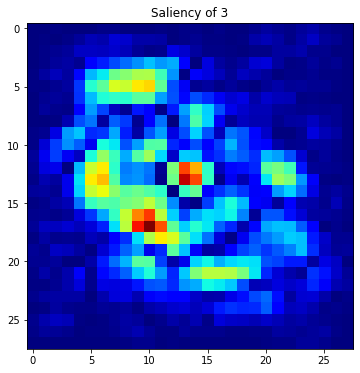

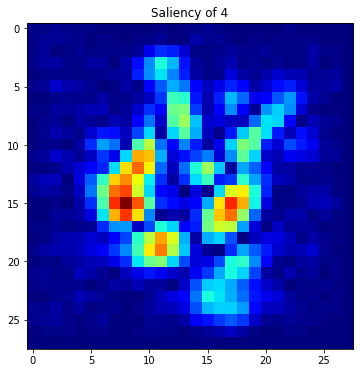

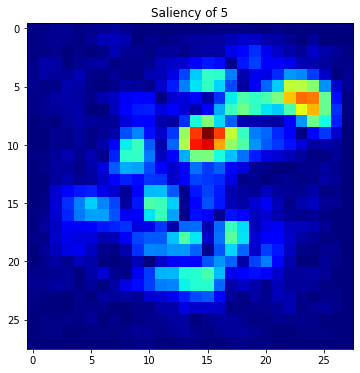

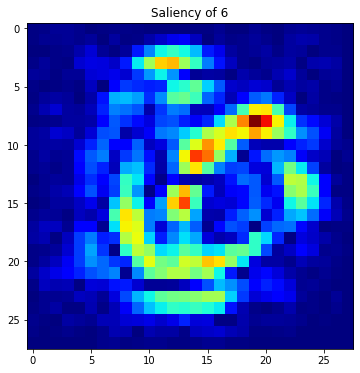

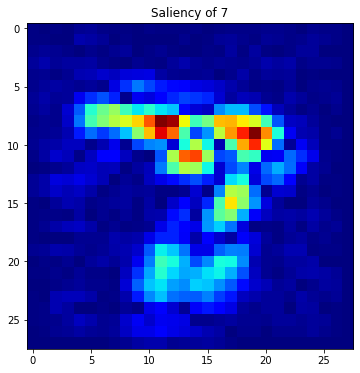

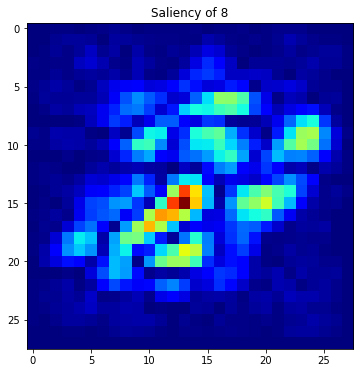

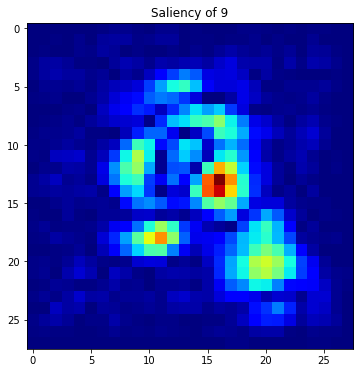

In [42]:
#how each number is seen by the last layer
for num_idx in list(range(10)):
  idx = np.where(y_test[:,num_idx]==1.)[0][0]
  gradient = visualize_saliency(model,-1,num_idx,seed_input=x_test[idx])
  plt.figure()
  plt.title('Saliency of {}'.format(num_idx))
  plt.imshow(gradient,cmap='jet')